### Модели регрессии

#### Цель работы

Познакомиться с основными приемами работы с моделями регрессии в scikit-learn.

#### Задания для выполнения

1. Загрузите встроенный датасет о ценах на недвижимость в Калифорнии.
3. Постройте модель регрессии для предсказания цены конкретного объекта.
4. Оцените качество построенной модели с помощью визуализации и коэффициента детерминации.
1. Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.

#### Методические указания

В качестве исходных данных будем использовать датасет о ценах на объекты недвижимости в Калифорнии. Это один из известных обучающих наборов данных. Он встроен в библиотеку _sklearn_, так что его не нужно загружать или скачивать отдельно. Для начала работы импортируем стандартные необходимые библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

Сперва следует ознакомиться со структурой тех данных, которые мы получили. Для этого выведем тип полученного объекта:

In [2]:
type(california)

sklearn.utils._bunch.Bunch

Это специальный тип данных библиотеки _sklearn_, который похож по своему устройству на обычный словарь. Поэтому посмотрим, какие ключи есть в этом словаре:

In [3]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Особый интерес здесь представляют поля _data_ и _target_, которые содержат именно исходные атрибуты и вектор значений целевой переменной. Выведем их тип:

In [4]:
print(type(california.data), type(california.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Так как это массивы _numpy_, то можно посмотреть их форму:

In [5]:
print(california.data.shape, california.target.shape)

(20640, 8) (20640,)


Получается, что в данных  более 20 тысяч строк и 8 атрибутов. Дополнительно можно еще вывести описание датасета для получения дополнительной информации.

In [6]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Теперь с данными можно работать разными способами. Для удобства анализа мы объединим все массивы в датафрейм:

In [2]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Проверим данные на наличие пропущенных значений:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Видим, что пропусков в данных нет. Кроме того, видно, что все данные выражены в численных шкалах. Значит, особенной обработки данный датасет не требует, он уже достаточно чистый. Теперь можно вывести основную статистику по датасету:

In [9]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


Выделим целевую переменную и факторы:

In [3]:
y = data['Price']
X = data.drop('Price', axis=1)
y.shape, X.shape

((20640,), (20640, 8))

Приступим к обучению и оценке качества модели. Из набора линейных моделей библиотеки _sklearn_ импортируем линейную регрессию:

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\k.musina\AppData\Local\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = sel

Как и в предыдущих работах выведем коэффициенты модели, так как в линейных моделях они имеют некоторый смысл:

In [12]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


Выведем коэффициенты вместе с названиями атрибутов:

In [13]:
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]

MedInc 0.4366932931343251
HouseAge 0.009435778033238239
AveRooms -0.10732204139090505
AveBedrms 0.6450656935198156
Population -3.976389421231644e-06
AveOccup -0.003786542654970985
Latitude -0.42131437752714374
Longitude -0.4345137546747769


Положительные коэффициенты являются наиболее влияющими признаками на определение цены недвижимости в Калифорнии. Таким образом, на определение цены в первую очередь влияет количество спален в квартире/доме (65.59%) и средний доход в этом блоке (60.75%). 

С вероятностью, приближенной к 50%, на определение цены будет влиять возраст дома и среднее количество членов семьи.

Меньше всего на стоимость недвижимости влияет количество жителей в блоке, широта и долгота блока, количество комнат в квартире/доме.

Как и в модели линейной регрессии, данный вектор не включает в себя свободный коэффициент. Он хранится в отдельном поле класса:

In [14]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -36.94192020718434


Сделаем предсказания модели и выведем на экран первые несколько точек:

In [5]:
y_pred = model.predict(X)
print(y_pred[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


Для сравнения выведем реальные соответствующие значения целевой переменной:

In [16]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


Конечно, так анализировать данные неудобно. Лучше построить график, демонстрирующий связь между реальными и предсказанными значениями целевой переменной:

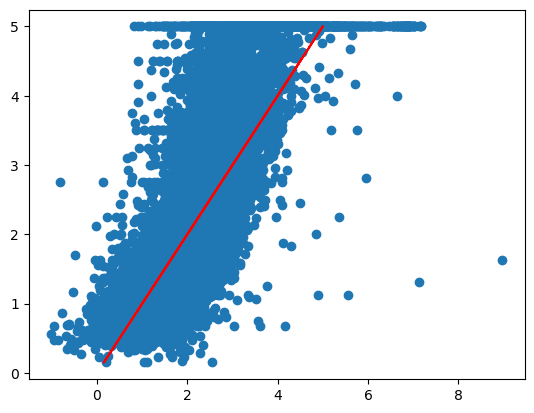

In [17]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

На этом графике чем ближе точки к центральной линии, тем более точные прогнозы делает модель. В данном случае разброс довольно велик. Чтобы оценить эффективность модели численно, опять обратимся к встроенной метрике, реализованной методом _score_ - коэффициенту детерминации:

In [18]:
model.score(X, y)

0.6062326851998051

Уровень 0.6 показывает, что модель могла бы быть более точной. Давайте попробуем построить другую модель - полиномиальную регрессию. Есть надежда, что введение полиномиальных признаков может существенно увеличить точность модели:

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5).fit_transform(X)

Построим предсказание для анализа:

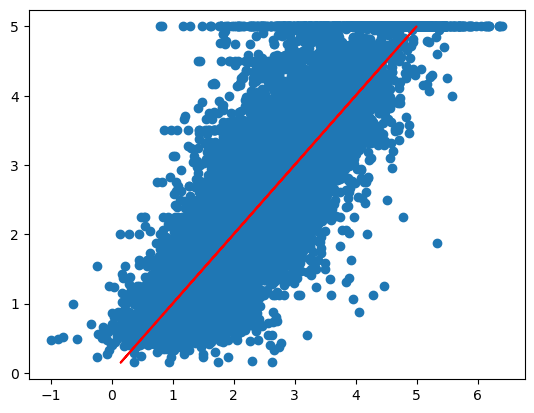

In [7]:
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

По этому графику можно сделать вывод, что модель стала несколько более точной. Но более конкретно это улучшение можно увидеть при помощи выбранной метрики:

In [21]:
polynomial.score(poly, y)

0.7439678302173067

Метрика показывает, что вторая модель примерно на 14 процентных пунктов лучше, чем первая.


#### Дополнительные задания

1. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.
1. Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите матрицу классификации и оценку точности. Рекомендуется исследовать следующие модели:
    1. Метод опорных векторов
        1. Без ядра
        1. С линейным ядром
        1. С гауссовым ядром
        1. С полиномиальным ядром
    1. Метод ближайших соседей
    1. Многослойный перцептрон
    1. Дерево решений
    1. Наивный байесовский классификатор
    1. (\*) Другие методы:
        1. Пассивно-агрессивный классификатор
        1. Гребневый классификатор
        1. Случайный лес
        1. Беггинг
        1. Другие модели по желанию
1. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.
1. Повторите полностью анализ для другого набора данных - встроенного _pima-indian-diabetes_.

#### Дополнительная информация о модели:
- ***rank_*** - ранг матрицы Х:

In [22]:
model.rank_, polynomial.rank_

(8, 298)

- ***singular_*** - сингулярные значения Х:

In [23]:
model.singular_, polynomial.singular_

(array([1.62693602e+05, 1.73178899e+03, 1.48489456e+03, 4.13011226e+02,
        3.68485454e+02, 2.47744430e+02, 7.18215739e+01, 2.50607596e+01]),
 array([6.09278529e+22, 2.20426639e+19, 4.10999688e+18, ...,
        1.09776087e+06, 7.57836498e+05, 3.15350529e+05]))

- ***n_features_in_*** - количество признаков для обучения:

In [24]:
model.n_features_in_, polynomial.n_features_in_

(8, 1287)

#### Изменим количество аргументов при создании модели и посмотрим, к чему это приведет. Сначала отсортируем признаки по важности:

In [10]:
num = data.select_dtypes(include=np.number)
cols = num.columns[0:7].to_list()
cols.append('Price')
plt.figure(figsize=(9,9), dpi=100)
corr_m = data[cols].corr()
corr_m['Price'].sort_values()

Latitude     -0.144160
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
Price         1.000000
Name: Price, dtype: float64

<Figure size 900x900 with 0 Axes>

Возьмем 3, 6 и 8 признаков для дальнейшего обучения:

In [11]:
ft3 = corr_m['Price'].apply(lambda x: abs(x)).sort_values()[-4:-1].index.to_list()
ft6 = corr_m['Price'].apply(lambda x: abs(x)).sort_values()[-7:-1].index.to_list()
ft8 = corr_m['Price'].apply(lambda x: abs(x)).sort_values()[-9:-1].index.to_list()

ft3, ft6, ft8

(['Latitude', 'AveRooms', 'MedInc'],
 ['Population', 'AveBedrms', 'HouseAge', 'Latitude', 'AveRooms', 'MedInc'],
 ['AveOccup',
  'Population',
  'AveBedrms',
  'HouseAge',
  'Latitude',
  'AveRooms',
  'MedInc'])

Обучим новые модели на этих признаках:

In [12]:
from sklearn.model_selection import train_test_split

data_tmp = data
X3 = data_tmp[ft3].fillna(-1).values
X6 = data_tmp[ft6].fillna(-1).values
X8 = data_tmp[ft8].fillna(-1).values

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=17)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.2, random_state=17)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y, test_size=0.2, random_state=17)

logistic_3 = LinearRegression()
logistic_3.fit(X3_train, y3_train)

logistic_6 = LinearRegression()
logistic_6.fit(X6_train, y6_train)

logistic_8 = LinearRegression()
logistic_8.fit(X8_train, y8_train)

LinearRegression()

In [13]:
logistic_3.score(X3, y), logistic_6.score(X6, y), logistic_8.score(X8, y)

(0.4857226878109373, 0.5407660135647658, 0.542598556536545)

Обучение на меньшем количестве признаков дало худший результат.

#### Попробуем применить к той же задаче другие модели классификации. Для каждой из них выведем матрицу классификации и оценку точности. Исследуем следующие модели:
1. Метод опорных векторов
    1. Без ядра
    1. С линейным ядром
    1. С гауссовым ядром
    1. С полиномиальным ядром
1. Метод ближайших соседей
1. Многослойный перцептрон
1. Дерево решений
1. Наивный байесовский классификатор
1. (\*) Другие методы:
    1. Пассивно-агрессивный классификатор
    1. Гребневый классификатор
    1. Случайный лес
    1. Беггинг
Напишем функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

<br>При расчетах будем использовать метрику R2-score.

- Коэффициент детерминации R2 (R-квадрат) представляет собой меру того, насколько хорошо модель соответствует вариации в зависимой переменной. Рассчитывается по следующей формуле:

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$

где:
$$ n $$ - количество наблюдений
$$ y_i $$ - фактическое значение зависимой переменной для наблюдения \( i \)
$$ \hat{y}_i $$ - предсказанное значение зависимой переменной для наблюдения \( i \)
$$ \bar{y} $$ - среднее значение зависимой переменной по всем наблюдениям

Коэффициент детерминации R2 лежит в диапазоне от 0 до 1. Значение 1 указывает на идеальное соответствие модели данным, а значение 0 указывает на то, что модель не объясняет никакой вариации. Отрицательные значения R2 могут возникнуть, если модель хуже объясняет данные, чем просто использование среднего значения зависимой переменной.

In [14]:
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

y = data['Price']
X = data.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [15]:
def score(y_pred, y_test):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    abs_err = np.abs(y_test - y_pred)
    rel_err = abs_err / y_test
    percent_err = rel_err * 100
    mape = np.mean(percent_err)
    
    return r2, mse, mape

In [16]:
def plot(y_test, y_pred, label):
    plt.scatter(y_test, y_pred, label=label)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.show()

**Метод опорных векторов (с линейным ядром):**

In [17]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor

R2-score: 0.603687581170083
Mean Squared Error (MSE): 0.5182099784743426
Mean Absolute Percentage Error (MAPE): 30.063146280074626


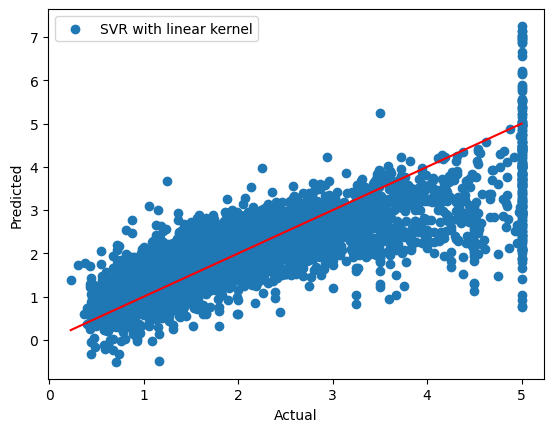

In [19]:
regr1 = make_pipeline(StandardScaler(), SVR(kernel = 'linear', C=2.0, epsilon=0.5))
regr1.fit(X_train, y_train)

y_pred = regr1.predict(X_test)

r2, mse, mape = score(y_pred, y_test)

print(f'R2-score:', r2)
print(f'Mean Squared Error (MSE):', mse)
print(f'Mean Absolute Percentage Error (MAPE):', mape)

plot(y_test, y_pred, label='SVR with linear kernel')

**С гауссовым ядром:**

R2-score: 0.7396389947515001
Mean Squared Error (MSE): 0.34044270256210885
Mean Absolute Percentage Error (MAPE): 20.86821364440329


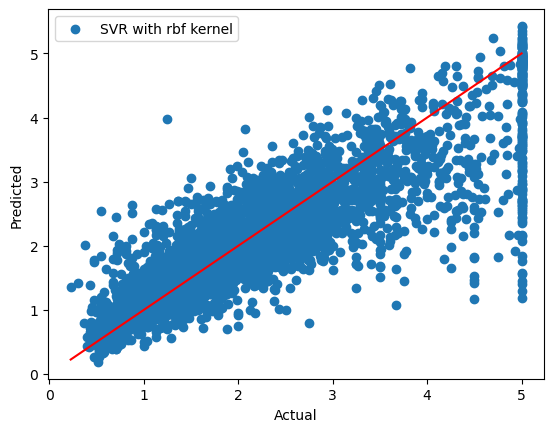

In [22]:
regr2 = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C=2.0, epsilon=0.2))
regr2.fit(X_train, y_train)

y_pred = regr2.predict(X_test)

r2, mse, mape = score(y_pred, y_test)

print(f'R2-score:', r2)
print(f'Mean Squared Error (MSE):', mse)
print(f'Mean Absolute Percentage Error (MAPE):', mape)

plot(y_test, y_pred, label='SVR with rbf kernel')

**Метод ближайших соседей:**

Регрессия на основе соседей может использоваться в случаях, когда метки данных являются непрерывными, а не дискретными переменными. Метка, присвоенная точке запроса, вычисляется на основе среднего значения меток ее ближайших соседей.

Базовая регрессия ближайших соседей использует одинаковые веса: то есть каждая точка в локальной окрестности вносит единообразный вклад в классификацию точки запроса. При некоторых обстоятельствах может быть выгодно взвесить точки так, чтобы близлежащие точки вносили больший вклад в регрессию, чем удаленные точки. Это можно сделать с помощью weights ключевого слова. Значение по умолчанию weights = ‘uniform’ присваивает всем точкам одинаковые веса. weights = ‘distance’ назначает веса, обратно пропорциональные расстоянию от точки запроса. В качестве альтернативы может быть предоставлена определяемая пользователем функция расстояния, которая будет использоваться для вычисления весов.

R2-score: 0.15566103879712168
Mean Squared Error (MSE): 1.1040402826684341
Mean Absolute Percentage Error (MAPE): 53.33279479560854


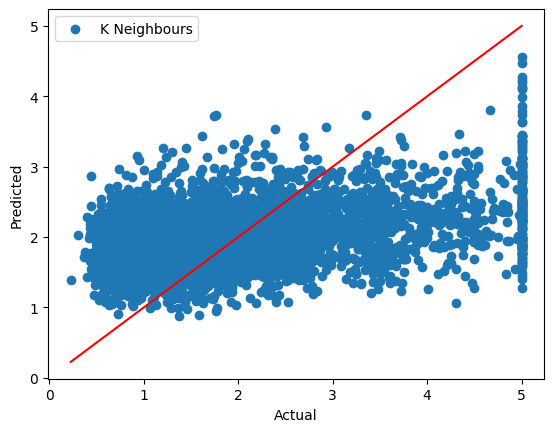

In [35]:
k = 9
regr4 = KNeighborsRegressor(n_neighbors=k)
regr4.fit(X_train, y_train)

y_pred = regr4.predict(X_test)

r2, mse, mape = score(y_pred, y_test)

print(f'R2-score:', r2)
print(f'Mean Squared Error (MSE):', mse)
print(f'Mean Absolute Percentage Error (MAPE):', mape)

plot(y_test, y_pred, label='K Neighbours')

**Многослойный персептрон:**

Класс MLPRegressor реализует многослойный перцептрон (MLP), который обучается с использованием обратного распространения без функции активации в выходном слое, что также можно рассматривать как использование функции идентификации в качестве функции активации. Следовательно, он использует квадратную ошибку как функцию потерь, а на выходе представляет собой набор непрерывных значений.

MLPRegressor также поддерживает регрессию с несколькими выходами, при которой в выборке может быть более одной цели.

R2-score: 0.5885373452101224
Mean Squared Error (MSE): 0.538020115824749
Mean Absolute Percentage Error (MAPE): 27.503873526085528


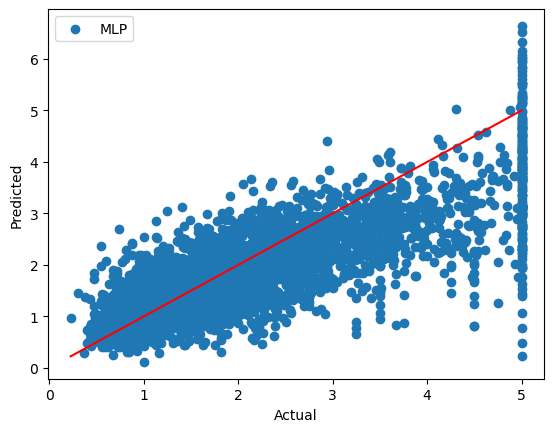

In [37]:
regr5 = MLPRegressor(random_state=17, max_iter=10000)
regr5.fit(X_train, y_train)

y_pred = regr5.predict(X_test)

r2, mse, mape = score(y_pred, y_test)

print(f'R2-score:', r2)
print(f'Mean Squared Error (MSE):', mse)
print(f'Mean Absolute Percentage Error (MAPE):', mape)

plot(y_test, y_pred, label='MLP')

**Дерево решений:**

Деревья решений также могут применяться к задачам регрессии с помощью класса DecisionTreeRegressor.

Как и в настройке классификации, метод fit будет принимать в качестве аргументов массивы X и y, только в этом случае ожидается, что y будет иметь значения с плавающей запятой вместо целочисленных значений. 

В случае, если существует несколько классов с одинаковой и самой высокой вероятностью, классификатор предскажет класс с самым низким индексом среди этих классов. В качестве альтернативы выводу определенного класса можно предсказать вероятность каждого класса, которая представляет собой долю обучающих выборок класса в листе.

R2-score: 0.6277625227074402
Mean Squared Error (MSE): 0.48673007942732555
Mean Absolute Percentage Error (MAPE): 24.257110723725972


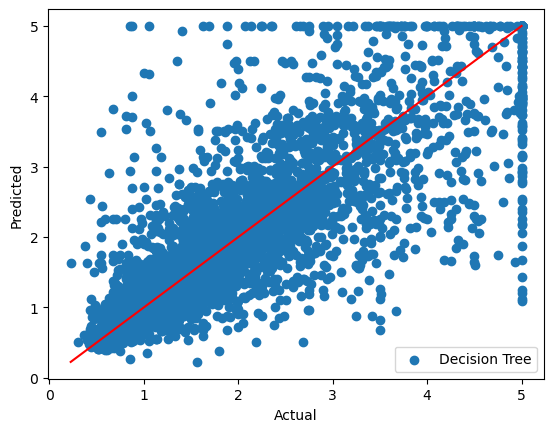

In [49]:
regr6 = DecisionTreeRegressor(random_state=0, criterion="poisson")
regr6.fit(X_train, y_train)

y_pred = regr6.predict(X_test)

r2, mse, mape = score(y_pred, y_test)

print(f'R2-score:', r2)
print(f'Mean Squared Error (MSE):', mse)
print(f'Mean Absolute Percentage Error (MAPE):', mape)

plot(y_test, y_pred, label='Decision Tree')                   

**Байесовская регрессия:**

Для включения параметров регуляризации в процедуру оценки можно использовать методы байесовской регрессии: параметр регуляризации не устанавливается в жестком смысле, а настраивается на имеющиеся данные.

Преимущества байесовской регрессии:

- Он адаптируется к имеющимся данным.
- Его можно использовать для включения параметров регуляризации в процедуру оценки.

К недостаткам байесовской регрессии можно отнести:

- Вывод модели может занять много времени.

R2-score: 0.6026938568887708
Mean Squared Error (MSE): 0.5195093519331623
Mean Absolute Percentage Error (MAPE): 31.428855865559388


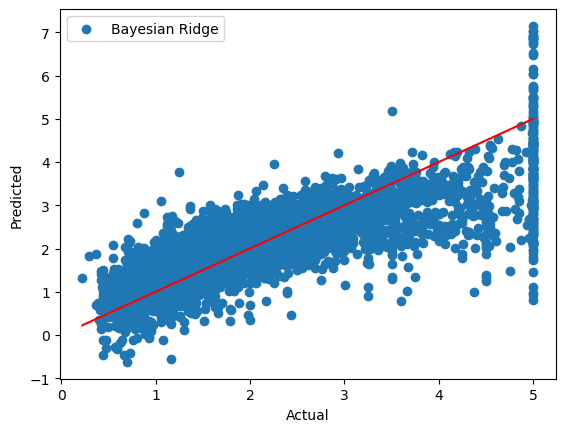

In [74]:
regr7 = linear_model.BayesianRidge()
regr7.fit(X_train, y_train)

y_pred = regr7.predict(X_test)

r2, mse, mape = score(y_pred, y_test)

print(f'R2-score:', r2)
print(f'Mean Squared Error (MSE):', mse)
print(f'Mean Absolute Percentage Error (MAPE):', mape)

plot(y_test, y_pred, label='Bayesian Ridge')    

**Пассивно-агрессивная регрессия:**

Пассивно-агрессивные алгоритмы — это семейство алгоритмов для крупномасштабного обучения. Они похожи на перцептрон в том, что не требуют скорости обучения. Однако, в отличие от перцептрона, они включают параметр регуляризации C.

R2-score: 0.0989010623892167
Mean Squared Error (MSE): 1.178258461950794
Mean Absolute Percentage Error (MAPE): 42.21931111532068


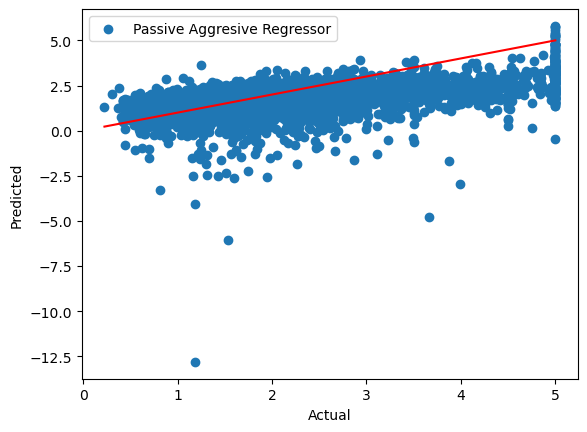

In [75]:
regr8 = PassiveAggressiveRegressor(max_iter=100, random_state=0, tol=1e-3)
regr8.fit(X_train, y_train)

y_pred = regr8.predict(X_test)

r2, mse, mape = score(y_pred, y_test)

print(f'R2-score:', r2)
print(f'Mean Squared Error (MSE):', mse)
print(f'Mean Absolute Percentage Error (MAPE):', mape)

plot(y_test, y_pred, label='Passive Aggresive Regressor')    

**Гребневая регрессия**

Регрессия гребня ядра (KRR) сочетает в себе регрессию и классификацию Риджа (линейный метод наименьших квадратов с регуляризацией по l2-норме) с уловкой ядра. Таким образом, он изучает линейную функцию в пространстве, индуцированную соответствующим ядром и данными. Для нелинейных ядер это соответствует нелинейной функции в исходном пространстве.

Форма модели KernelRidge идентична форме поддержки векторной регрессии (SVR). Однако используются другие функции потерь: KRR использует квадратичную потерю ошибок, в то время как опорная векторная регрессия используетϵ-нечувствительные потери в сочетании с регуляризацией l2. В отличие от этого SVR, подгонка KernelRidge может выполняться в закрытой форме и обычно быстрее для наборов данных среднего размера. С другой стороны, изученная модель не является разреженной и, следовательно, медленнее, чем SVR.

R2-score: 0.5444706201922891
Mean Squared Error (MSE): 0.595640860313017
Mean Absolute Percentage Error (MAPE): 34.491283393818385


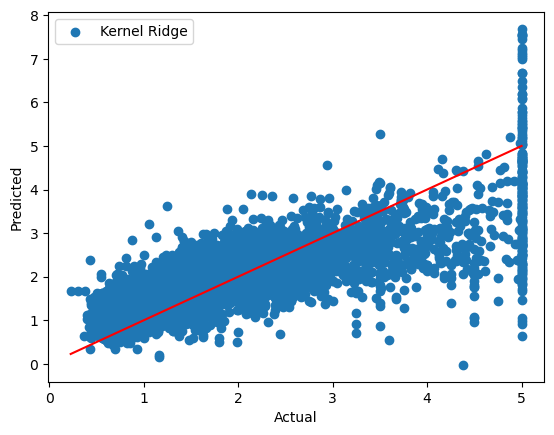

In [76]:
regr9 = KernelRidge(alpha=1.0)
regr9.fit(X_train, y_train)

y_pred = regr9.predict(X_test)

r2, mse, mape = score(y_pred, y_test)

print(f'R2-score:', r2)
print(f'Mean Squared Error (MSE):', mse)
print(f'Mean Absolute Percentage Error (MAPE):', mape)

plot(y_test, y_pred, label='Kernel Ridge')   

**Случайный лес:**

Случайный лес — это метаоценщик, который соответствует ряду классификаторов дерева решений для различных подвыборок набора данных и использует усреднение для повышения точности прогнозирования и контроля переподбора. Размер подвыборки контролируется параметром max_samples, если bootstrap=True (по умолчанию), в противном случае для построения каждого дерева используется весь набор данных.    

R2-score: 0.46527899803380823
Mean Squared Error (MSE): 0.699190198825436
Mean Absolute Percentage Error (MAPE): 40.35223190744416


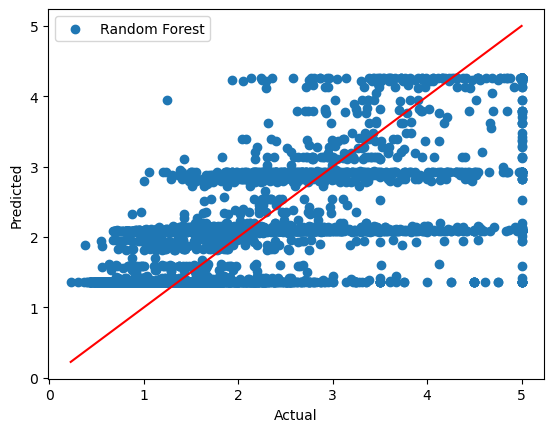

In [78]:
regr10 = RandomForestRegressor(max_depth=2, random_state=0)
regr10.fit(X_train, y_train)

y_pred = regr10.predict(X_test)

r2, mse, mape = score(y_pred, y_test)

print(f'R2-score:', r2)
print(f'Mean Squared Error (MSE):', mse)
print(f'Mean Absolute Percentage Error (MAPE):', mape)

plot(y_test, y_pred, label='Random Forest')   

In [17]:
regressors = [
    ("SVR linear kernel", make_pipeline(StandardScaler(), SVR(kernel = 'linear', C=2.0, epsilon=0.5))),
    ("SVR rbf kernel", make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C=2.0, epsilon=0.2))),
    ("KNeighborsl", KNeighborsRegressor(n_neighbors=9)),
    ("MLP", MLPRegressor(random_state=17, max_iter=10000)),
    ("TreeDecision", DecisionTreeRegressor(random_state=0, criterion="poisson")),
    ("BayesRidge", linear_model.BayesianRidge()),
    ("PassiveAgressive", PassiveAggressiveRegressor(max_iter=100, random_state=0, tol=1e-3)),
    ("Ridge", KernelRidge(alpha=1.0)),
    ("RandomForest", RandomForestRegressor(max_depth=2, random_state=0)),
]

def fit_and_score(X_train, X_test, y_train, y_test):
    for name, regr in regressors:
        print("training %s" % name)
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        print(regr.score(X_test, y_test))
        
def fit_score_and_plot(X_train, X_test, y_train, y_test):
    for name, regr in regressors:
        print("training %s" % name)
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        print(regr.score(X_test, y_test))
        plot(y_test, y_pred, label=name)  

In [36]:
fit_and_score(X_train, X_test, y_train, y_test)

training SVR linear kernel
0.6008297112579266
training SVR rbf kernel
0.7396389947515001
training KNeighborsl
0.13789920729285143
training MLP
0.560682772162246
training TreeDecision
0.6083962752816285
training BayesRidge
0.6026938568887708
training PassiveAgressive
0.0989010623892167
training Ridge
0.5444706201922891
training RandomForest
0.46527899803380823


#### Повторим полностью анализ для другого набора данных - встроенного _pima-indian-diabetes_.

In [81]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [82]:
type(diabetes)

sklearn.utils._bunch.Bunch

In [83]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [84]:
print(type(diabetes.data), type(diabetes.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [85]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [86]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [87]:
data_d = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
data_d['disease progression'] = diabetes.target
data_d.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [88]:
data_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  442 non-null    float64
 1   sex                  442 non-null    float64
 2   bmi                  442 non-null    float64
 3   bp                   442 non-null    float64
 4   s1                   442 non-null    float64
 5   s2                   442 non-null    float64
 6   s3                   442 non-null    float64
 7   s4                   442 non-null    float64
 8   s5                   442 non-null    float64
 9   s6                   442 non-null    float64
 10  disease progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [89]:
data_d.describe().round(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease progression
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,152.13
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14,346.00


In [90]:
y_d = data_d['disease progression']
X_d = data_d.drop('disease progression', axis=1)

X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.2, random_state=17)

Построим модель линейной регрессии для нового датасета.

In [91]:
model = LinearRegression()
model.fit(X_d_train, y_d_train)

y_pred = model.predict(X_d_test)
print(y_pred[:5])
print(y_test[:5])

[176.94470464 227.40758121  98.98507285 100.15041295 105.45965752]
18403    2.38800
13405    1.08800
9539     0.72700
8668     5.00001
9019     3.99200
Name: Price, dtype: float64


0.4527863540208549

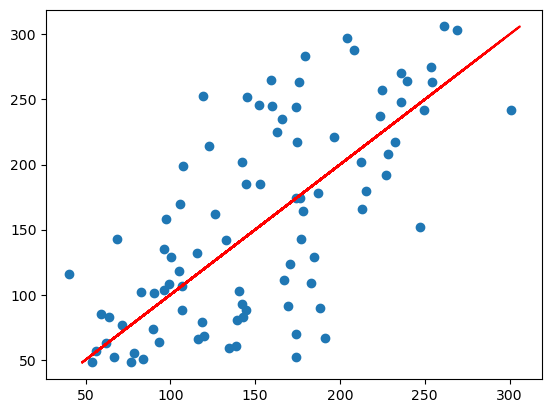

In [92]:
plt.scatter(y_pred, y_d_test)
plt.plot(y_d_test, y_d_test, c='r')
model.score(X_d_test, y_d_test)

training SVR linear kernel
0.43168579161873766


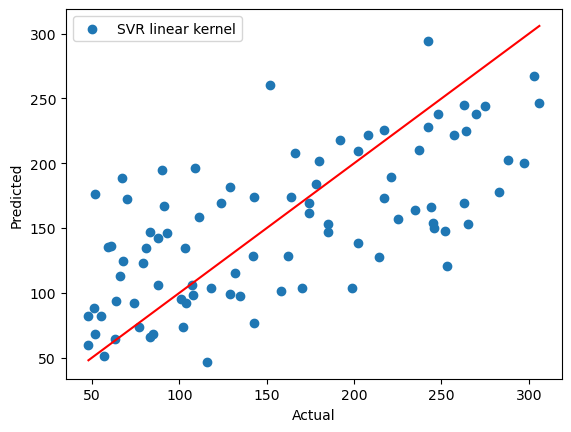

training SVR rbf kernel
0.24013885570289806


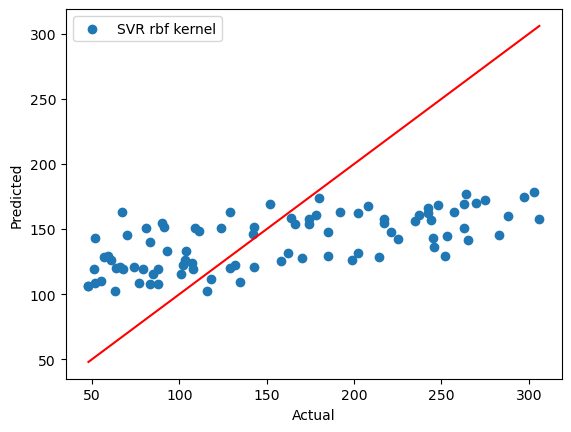

training KNeighborsl
0.35533582479157155


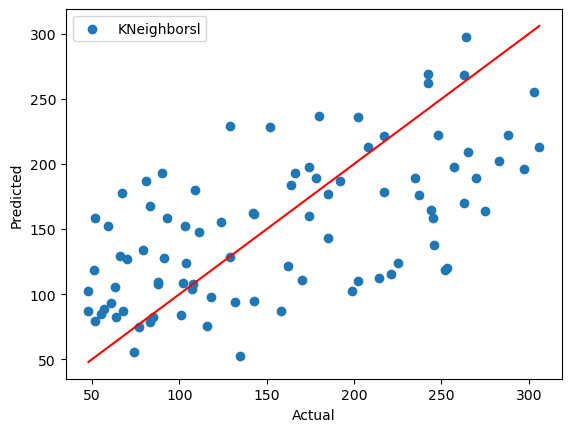

training MLP
0.437301436050188


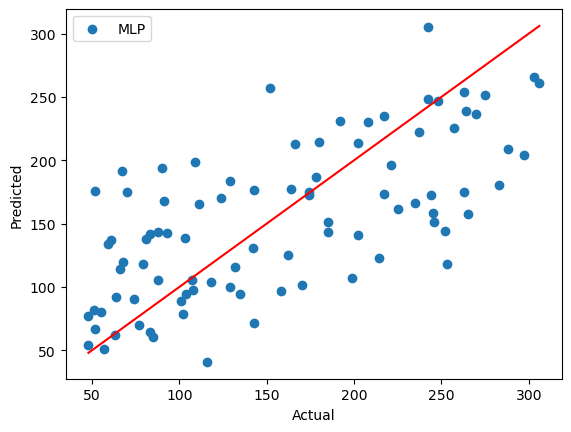

training TreeDecision
-0.060123889360030436


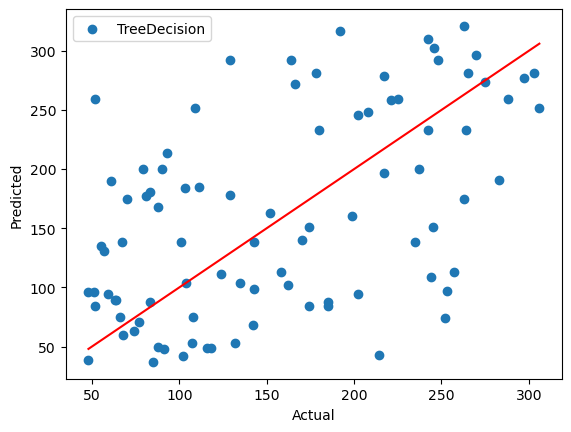

training BayesRidge
0.448574793136684


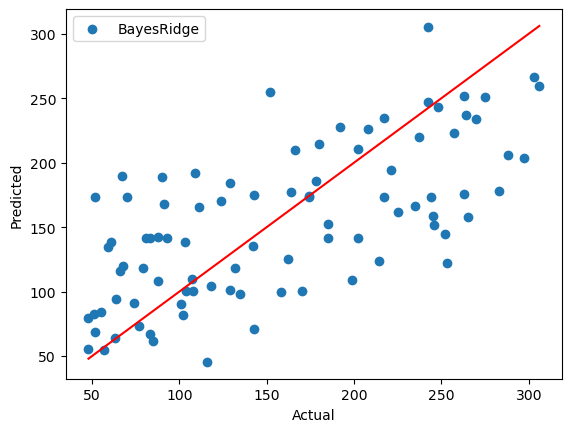

training PassiveAgressive
0.43098992290631666


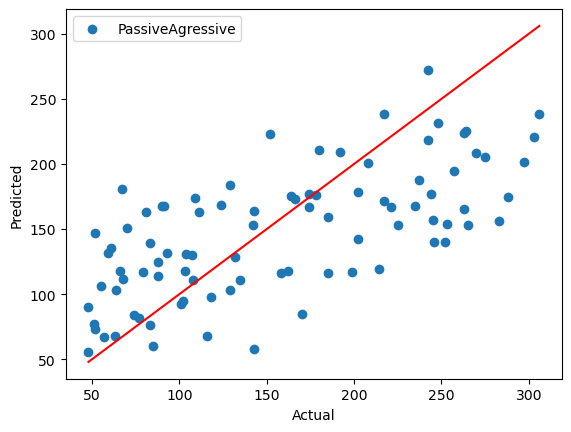

training Ridge
-3.71895088542308


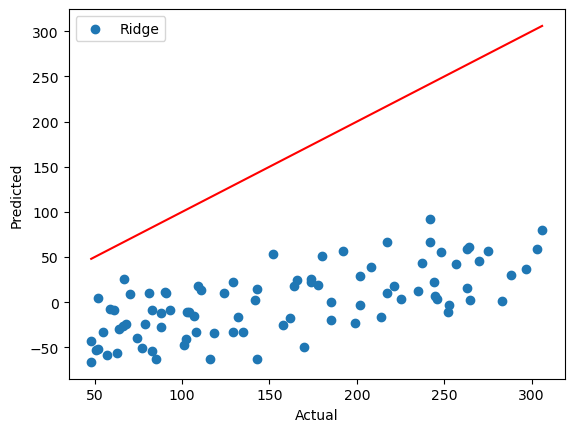

training RandomForest
0.4386744960875394


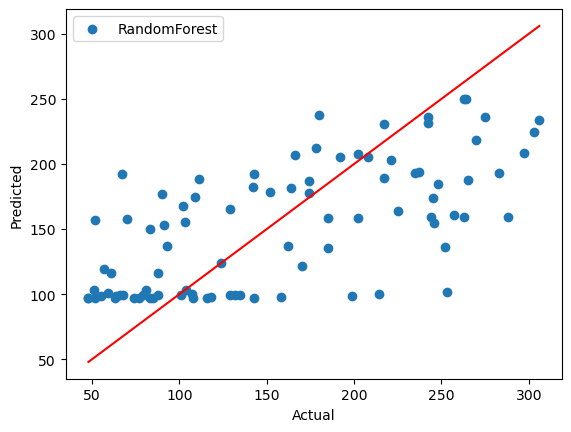

In [93]:
fit_score_and_plot(X_d_train, X_d_test, y_d_train, y_d_test)

#### Контрольные вопросы

1. **Чем отличается применение разных моделей регрессии в бибилиотеке _sklearn_ от моделей классфикации?**

    Применение различных моделей регрессии в библиотеке scikit-learn отличается тем, что модели регрессии используются для предсказания непрерывной зависимой переменной, в то время как модели классификации применяются для предсказания дискретной зависимой переменной (класса). 
    <br>

2. **Что показывает коэффициент детерминации для модели регрессии?**
    
    Коэффициент детерминации (R²) для модели регрессии показывает, какую часть изменчивости зависимой переменной можно объяснить моделью. Он измеряет отношение объясненной дисперсии к общей дисперсии. 
    <br>

3. **Какое значение имеют коэффициенты линейной регрессии?**

    Коэффициенты линейной регрессии представляют собой веса, присваиваемые каждому признаку в модели. Они показывают вклад каждого признака в предсказание зависимой переменной. 
    <br>

4. **Какие атрибуты имеет объект линейной регрессии?**

    Объект линейной регрессии включает в себя атрибуты, такие как коэффициенты (coef_) и свободный член (intercept_), которые представляют параметры модели.